In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from matplotlib.image import imread

In [4]:
images = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = images.flow_from_directory(batch_size=10,
                                                 directory='/content/gdrive/MyDrive/Dataset/train_set',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

test_dataset = images.flow_from_directory(batch_size=10,
                                                 directory='/content/gdrive/MyDrive/Dataset/test_set',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 30 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [6]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [7]:
history=model.fit(train_dataset,batch_size=10,epochs=20,verbose=1,
                  validation_data=test_dataset)

Epoch 1/20
3/3 [==============================] - 16s 3s/step - loss: 2.6350 - accuracy: 0.3667
Epoch 2/20
3/3 [==============================] - 2s 632ms/step - loss: 1.4061 - accuracy: 0.5333
Epoch 3/20
3/3 [==============================] - 2s 620ms/step - loss: 0.9014 - accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 2s 629ms/step - loss: 1.1767 - accuracy: 0.6333
Epoch 5/20
3/3 [==============================] - 2s 622ms/step - loss: 0.9726 - accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 2s 617ms/step - loss: 0.8560 - accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 2s 626ms/step - loss: 0.3825 - accuracy: 0.8333
Epoch 8/20
3/3 [==============================] - 2s 629ms/step - loss: 0.2362 - accuracy: 0.9333
Epoch 9/20
3/3 [==============================] - 2s 627ms/step - loss: 0.5233 - accuracy: 0.7333
Epoch 10/20
3/3 [==============================] - 2s 626ms/step - loss: 0.4296 - accuracy: 0.8333
Epoch 11/20
3/3 [====

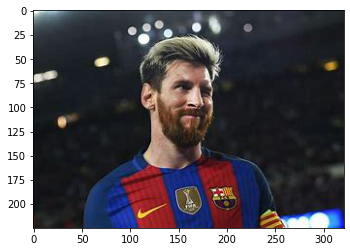

Day la Messi


In [8]:
import imageio
filename = '/content/gdrive/MyDrive/Dataset/train_set/Messi/2.png'  
img = imageio.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Messi')
elif kq ==1:
  print('Day la Neymar')
elif kq ==2:
  print('Day la Ronaldo')